In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [6]:
#Pre loading data and information 
per_loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
per_loan_desc = per_loan.describe()
per_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Creating a visual aid to identify outliers, and better understand data 
per_loan_values = per_loan["Personal Loan"].value_counts()
per_loan["Experience"] = per_loan["Experience"].replace([-3, -2, -1],0 )
desc = per_loan.describe()

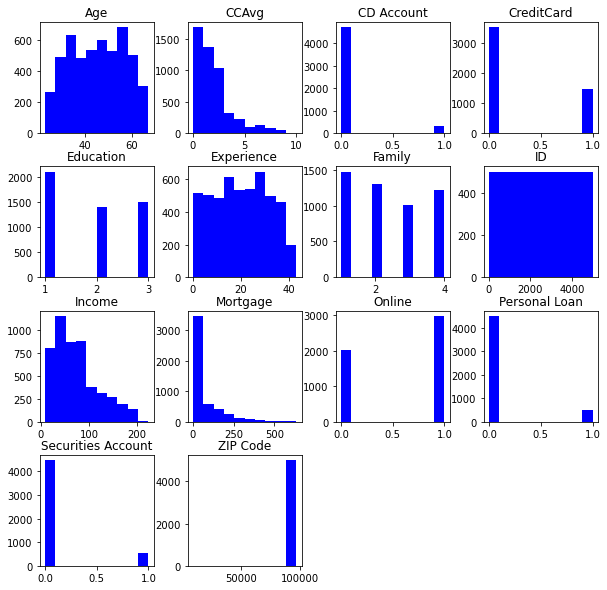

In [26]:
per_loan.hist(figsize=(10,10),color="blue", grid=False)
plt.show()

In [9]:
correlations = per_loan.corr()

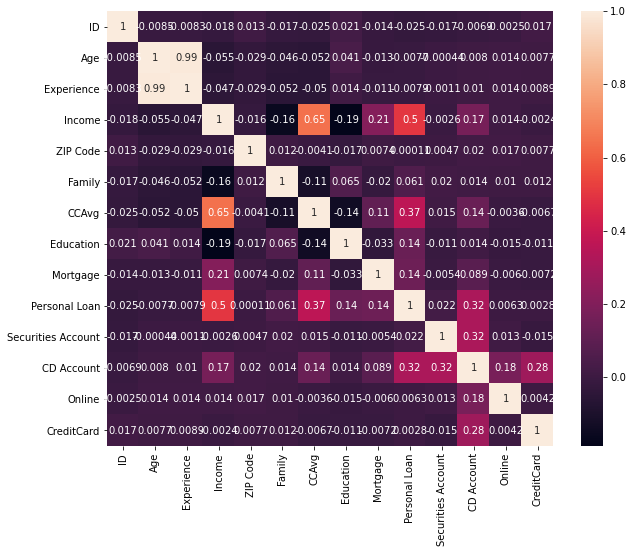

In [10]:
#Creating Heat Map 
plt.subplots(figsize=(10,8))
sns.heatmap(correlations,annot=True)

In [14]:
#Creaing X and Y variables for running our 3 different tests, also creating our dependent and independent variables
y = per_loan["Personal Loan"]
features = ["Income", "CCAvg", "Education", "Mortgage", "CD Account" ]
x = pd.get_dummies(per_loan[features])

In [15]:
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state = 19) 

In [16]:
#Test Model 1 Random Forest Module 
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=8)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

score = model.score(x_test, y_test)
print(score)

0.9660606060606061


In [23]:
#Test Model 2 Nearest Neighbour Classifier 
model_2 = KNeighborsClassifier()
model_2.fit(x_train, y_train)
y_predicted = model_4.predict(x_test)

score = model_2.score(x_test, y_test)
print(score)

0.9224242424242424


In [25]:
#Test Model 3 Defining the Decision Tree 
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)


score = model_3.score(x_test, y_test)
print(score)

0.9612121212121212
